In [1]:
import scipy.ndimage
import numpy as np

In [2]:
mat = scipy.ndimage.imread('pop11-310x415.png')

In [3]:
sea = mat[0,0]

In [4]:
sea

array([226, 255, 255, 255], dtype=uint8)

In [5]:
colors = mat.reshape(mat.shape[0] * mat.shape[1], mat.shape[2])
unique_colors = np.vstack({tuple(row) for row in colors})

In [6]:
len(unique_colors)

55064

In [7]:
# Taken from the scale in the image
scale = np.column_stack((np.array([225,221,254,54,254,252,248,123]),
                       np.array([254,226,254,137,253,174,67,0]),
                       np.array([254,229,254,46,196,95,38,0]),
                       255*np.ones(8)))

In [8]:
scale

array([[ 225.,  254.,  254.,  255.],
       [ 221.,  226.,  229.,  255.],
       [ 254.,  254.,  254.,  255.],
       [  54.,  137.,   46.,  255.],
       [ 254.,  253.,  196.,  255.],
       [ 252.,  174.,   95.,  255.],
       [ 248.,   67.,   38.,  255.],
       [ 123.,    0.,    0.,  255.]])

In [9]:
converted = np.array([np.array([np.linalg.norm(row) for row in scale - color]).argmin() for color in colors])

In [10]:
converted_reshape = converted.reshape(mat.shape[:2])

In [11]:
rows = np.sum(converted_reshape, 1) != 0
cols = np.sum(converted_reshape, 0) != 0
map_remove_sea = (converted_reshape[rows, :])[:,cols]

In [12]:
# Get rid of the north
map_remove_sea[map_remove_sea == 1] = 0

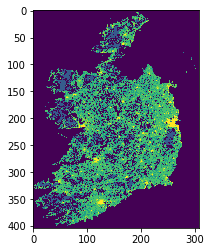

In [13]:
import matplotlib.pyplot as plt
plt.imshow(map_remove_sea)
plt.show()

In [14]:
# that 100 may need to be higher
lookup = np.array([0,0,0,5,(10+25)/2,(50+25)/2,(50+100)/2,100])

In [15]:
map_converted = lookup[map_remove_sea]

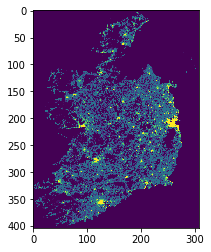

In [16]:
import matplotlib.pyplot as plt
plt.imshow(map_converted)
plt.show()

In [17]:
map_converted.shape[0]/map_converted.shape[1]

1.3116883116883118

In [18]:
# add a buffer on the left of zeros because this map is missing some of the west of kerry (guess no one lives in kerry?)
map_left_buffer = np.c_[np.zeros(map_converted.shape[0]), map_converted]

In [46]:
map_left_buffer.shape[0]/map_left_buffer.shape[1]

1.2523076923076923

In [20]:
# repeat till same ratio
while map_left_buffer.shape[0]/map_left_buffer.shape[1] > 1.251497005988024:
    map_left_buffer = np.c_[np.zeros(map_converted.shape[0]), map_left_buffer]

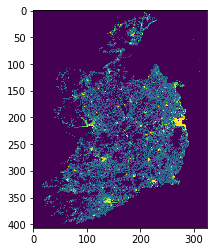

In [27]:
import matplotlib.pyplot as plt
plt.imshow(map_left_buffer)
plt.show()

In [45]:
map_left_buffer.shape

(407, 325)

In [23]:
# little hack to match up the dimensions (could use a scaling method here but that would be overkill)
#for i in range(3):
 #   map_left_buffer = np.vstack([map_left_buffer, np.zeros(map_left_buffer.shape[1])])

In [24]:
#for i in range(2):
 #   map_left_buffer = np.c_[map_left_buffer, np.zeros(map_left_buffer.shape[0])]

In [47]:
# zoom the image to match the precipiation map
scaled = scipy.ndimage.interpolation.zoom(map_left_buffer, [418.0/407, 334.0/325], order=0)

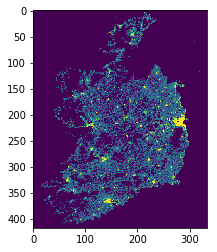

In [48]:
import matplotlib.pyplot as plt
plt.imshow(scaled)
plt.show()

In [49]:
scaled.shape

(418, 334)

In [51]:
np.savetxt('pop.mat', scaled)